#WINTER OF CODE 5.0

##Polynomial Regresssion

In [1]:
#importing pandas, numpy and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading a csv file
polynomial_train = pd.read_csv('/content/drive/MyDrive/polynomial_train.csv')
print(polynomial_train.shape)

#creating a 2D array
x_train=np.zeros((50000,5))

#importing values from polynomial train to the array x_train
x_train = polynomial_train.loc[:,:]

(50000, 5)


In [3]:
#creating array
x_train=np.array(x_train)
y_test= np.array(x_train[:,4])

#deleting 1st and last column of x_train
x_train=np.delete(x_train,4,axis=1)
x_train=np.delete(x_train,0,axis=1)

In [4]:
'''new variables to store seperate columns'''
a=x_train[:,0]
a=a.reshape(-1,1)
b=x_train[:,1]
b=b.reshape(-1,1)
c=x_train[:,2]
c=c.reshape(-1,1)

In [5]:
#polynomial fuction f(x)= a + b + c + a**2 + b**2 + c**2 + a**3 + b**3 + c**3 + a**2*b + b**2*c + c**2*a + abc + ab + bc + ca + a**2*c + b**2*a + c**2*b . 
X_train = np.c_[x_train, x_train*a , b*c ,b**2 ,c**2,(x_train**2)*a,(x_train**2)*b,(x_train**2)*c, a*b*c]
print(X_train.shape)

(50000, 19)


In [6]:
#This normalise X
def normalise(x):
  mean=np.mean(x,axis=0)
  std=np.std(x,axis=0)
  x_n=(x-mean)/std
  return x_n
  
X_train=normalise(X_train)
print(X_train.shape)

(50000, 19)


In [7]:
y_test=y_test.reshape(50000,1)
'''Y_test is printed before manipulating its value'''
print(y_test)

#To bring the value of y in between 0 and 1
y_test=(y_test-np.min(y_test))/(np.max(y_test)-np.min(y_test)) 

[[ -1294.28891782]
 [-27146.87008356]
 [ 64743.00171817]
 ...
 [  -285.70796526]
 [  8161.59530383]
 [  -255.16713134]]


In [8]:
w=np.zeros((19,1))
b=1
#Find  value of the Funtion f= w1x1 + w2x2 + w3x3 +...... +b
def predict(x,w,b):
  f_wb= np.dot(x,w) + b
  return f_wb

y_predict=predict(X_train,w,b)
print(y_predict.shape)

(50000, 1)


In [9]:
'''to compute cost by the formula summation(f(x)-y)**2 and 
then divided my 2*no of different sets of data'''

def cost(x,y,w,b):
  f=predict(x,w,b)
  m=x.shape[0]
  cost=(f-y)**2 
  cost=cost/(2*m)
  cost=np.sum(cost)
  return cost
  
#Let's see the cost 
cost(X_train,y_test,w,b)   

0.16583584798708337

In [10]:
#to calculate rms error function
def Rms(predictions, targets):
      return np.sqrt(((predictions - targets) ** 2).mean())

In [11]:
#This calculates dJ/dw and dJ/db and returns that 
def gradient(x,y,w,b):
  dj_dw=np.zeros((19,1))
  dj_db=0
  m=x.shape[0]
  f= predict(x,w,b)
  dj_db=np.sum(f-y)/m 
  dj_dw=np.dot(x.T,f-y)/m 
  return dj_dw, dj_db 

gradient(X_train,y_test,w,b)

(array([[-7.00836506e-03],
        [-9.37387268e-05],
        [-1.08234988e-04],
        [ 2.36971857e-04],
        [-2.51071121e-03],
        [ 6.33633297e-03],
        [ 2.14644384e-05],
        [-2.11541714e-05],
        [ 1.24003878e-04],
        [-1.22951801e-02],
        [-4.07243599e-03],
        [-5.49788858e-03],
        [-4.03168732e-04],
        [-5.56490964e-05],
        [ 1.09402766e-05],
        [-5.62166062e-04],
        [-2.33479919e-05],
        [-1.30543658e-04],
        [ 2.19284275e-03]]),
 0.5757462404492083)

cost after 1000 iterations 0.0030459268275082117
cost after 2000 iterations 6.935055665645558e-05
cost after 3000 iterations 1.2746123890118994e-05
cost after 4000 iterations 1.0770883592070864e-05
cost after 5000 iterations 1.0278929508377046e-05
cost after 6000 iterations 1.0032785472967479e-05
cost after 7000 iterations 9.901075919128913e-06
cost after 8000 iterations 9.829260490032427e-06
cost after 9000 iterations 9.789510130712934e-06
cost after 10000 iterations 9.767121474310718e-06
final w 
 [[-5.56938490e-03]
 [-1.45634360e-04]
 [-1.37190772e-04]
 [ 1.57038565e-04]
 [-1.84852269e-04]
 [ 1.47962486e-03]
 [ 6.44378793e-05]
 [-2.96150996e-05]
 [ 6.53023599e-05]
 [ 1.71194025e-02]
 [ 2.65519436e-05]
 [ 8.43970586e-04]
 [ 6.44041401e-04]
 [-2.17192333e-05]
 [ 2.29818809e-05]
 [ 7.85082807e-04]
 [-4.16061461e-05]
 [ 5.25027344e-05]
 [-1.88455130e-04]]
final b 0.42425376071396403


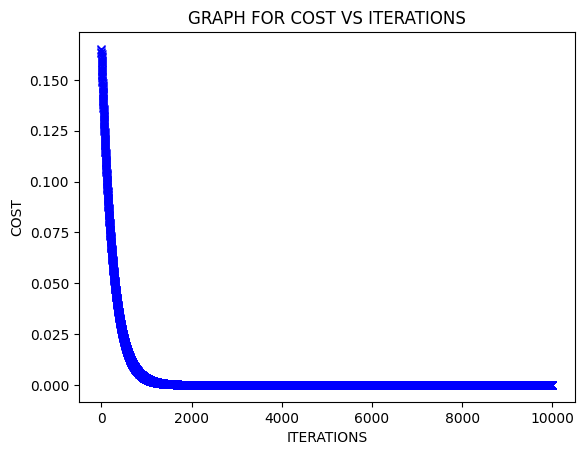

In [12]:
'''This uses the partial derivative and change w and b. 
In each steps to calculate cost and after complitions display the graph.
Also it gives the final w and b'''  

def gradient_descent(x,y,w,b,alpha):
  for i in range(iterations):
    dj_dw_f, dj_db_f= gradient(x,y,w,b)
    w= w - alpha*dj_dw_f
    b= b - alpha*dj_db_f
    if (i+1)%1000==0:
      print("cost after",i+1,"iterations",cost(x,y,w,b))
    h=cost(x,y,w,b)
    plt.plot(i,h,c='b',marker='x')
    plt.title("GRAPH FOR COST VS ITERATIONS")
    plt.xlabel("ITERATIONS")
    plt.ylabel("COST")
  return w,b

iterations=10000
alpha=0.002
w,b = gradient_descent(X_train,y_test,w,b,alpha)
print("final w \n",w)
print("final b",b)


In [13]:
y_predict=predict(X_train,w,b)
print("RMS error is : ", Rms(y_predict,y_test))

RMS error is :  0.004419755982927274
